# Selecionando Pontos Dentro de uma Regiao

In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

#### Visualizando se o crs estão iguais

In [3]:
rj.crs

{'proj': 'utm',
 'zone': 23,
 'south': True,
 'ellps': 'GRS80',
 'units': 'km',
 'no_defs': True}

In [4]:
geo_dados.crs

{'proj': 'utm',
 'zone': 23,
 'south': True,
 'ellps': 'GRS80',
 'units': 'km',
 'no_defs': True}

#### Plotando Rio de Janeiro

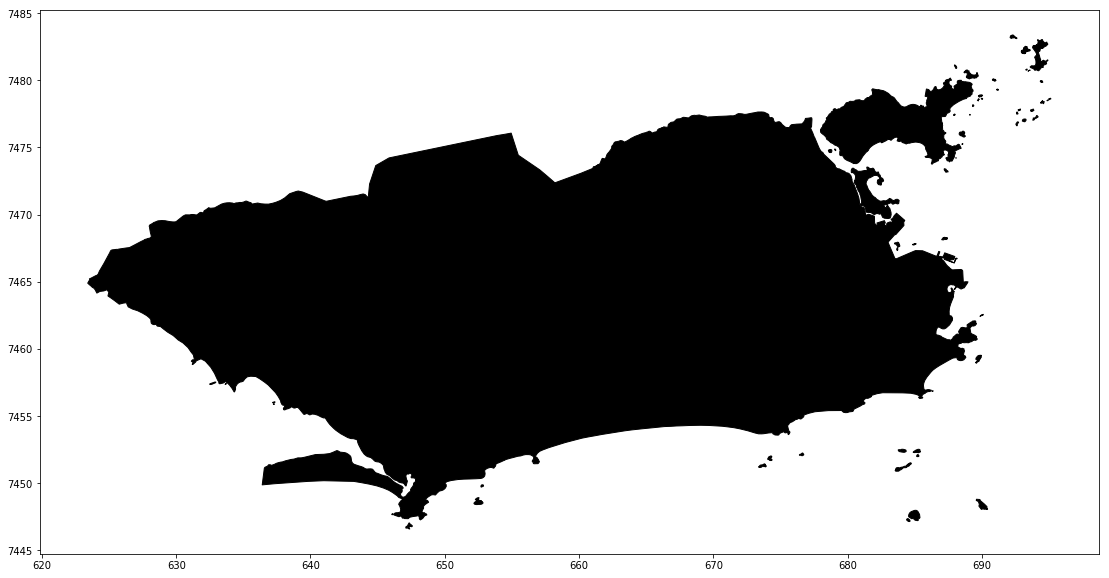

In [5]:
rj.plot(color = 'black', edgecolor = 'black', figsize = (20, 10))

#### Adicionando os pontos dentro da cidade do Rio de Janeiro e Identificando outliers

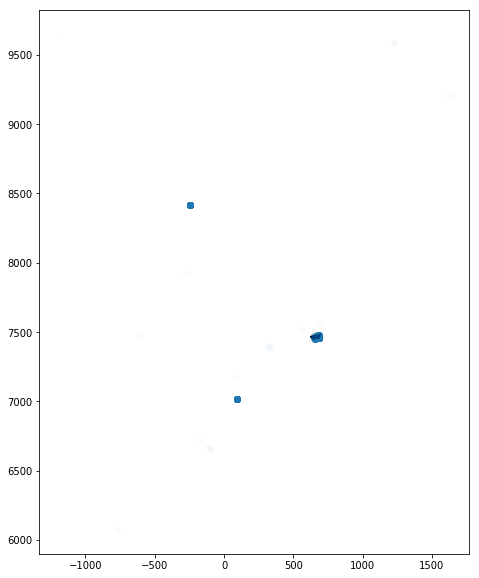

In [9]:
base = rj.plot(color = 'black', edgecolor = 'black', figsize = (20, 10))
geo_dados.plot(ax = base, figsize = (20, 10), alpha = 0.02)

## Selecionando dados em uma Região

In [10]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,(POLYGON ((692.5758012880638 7476.609203982483...


In [12]:
# Visualiznado
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 0, dtype: object

### Obtendo a geometria do rj e geo_dados 

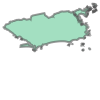

In [14]:
# Visualizando a geometria
rj.iloc[0].geometry

In [15]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

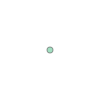

In [16]:
geo_dados.iloc[0].geometry

### Verificando se os dados contém a geometria dentro um do outro

In [17]:
# Verificando se o ponto está localizado dentro da geometria da variável rj
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [19]:
# Verificando se a região (RJ) contém o ponto
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

### Identificando quais são os outliers

In [20]:
# Realizando verificação para todos os registros do geo_dados
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [21]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.5137068691058 7453.832425203198)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.5239029320986 7461.803087641325)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.3450038415888 7469.439743130414)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.7013782087697 7457.284070512794)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.7146769203584 8415.116900905321)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.6639990843913 7469.215799932182)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.0096671354496 7452.943597272992)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.9093795411929 7459.847754353634)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393128993151 7464.417212955665)


### Provando que há outliers
Note que o index (4) a Latitude está com muita discrepância dos outros index.

In [23]:

amostra = geo_dados.iloc[:12]
amostra

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.5137068691058 7453.832425203198)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.5239029320986 7461.803087641325)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.3450038415888 7469.439743130414)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.7013782087697 7457.284070512794)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.7146769203584 8415.116900905321)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.0187146395718 7453.574299351502)
6,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,POINT (679.7464166558723 7462.761814641099)
7,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,POINT (685.2775265314278 7457.298273438209)
8,119,Barra da Tijuca,Rio de Janeiro,Península Fit,RJ,-14.235004,-51.925280,3,2,2,Apartamento,Venda,1130000,POINT (-248.7146769203584 8415.116900905321)
9,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,POINT (687.0963226866008 7462.359224637592)


### Plotando a cidade do Rio de Janeiro e provando que há outliers

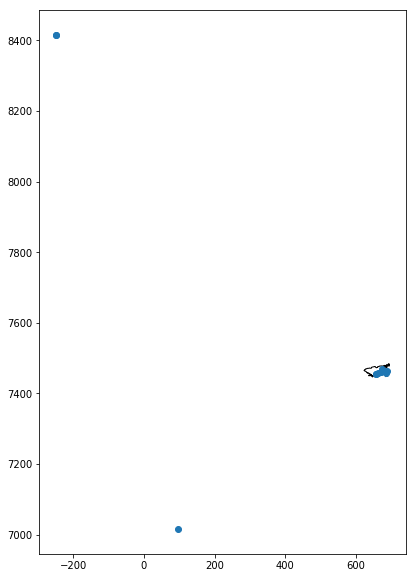

In [28]:
# Note que há 2 pontos foras da cidade do Rio de Janeiro. Esses são os pontos FALSE
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (20, 10))
amostra.plot(ax = base, figsize = (20, 10), alpha = 1)

### Eliminando os outliers

In [29]:
antes = geo_dados.shape[0]
antes

5000

In [30]:
# eliminando os outliers
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [32]:
depois = geo_dados.shape[0]
antes - depois

487

### Plotando cidade do Rio de Janeiro sem os outliers

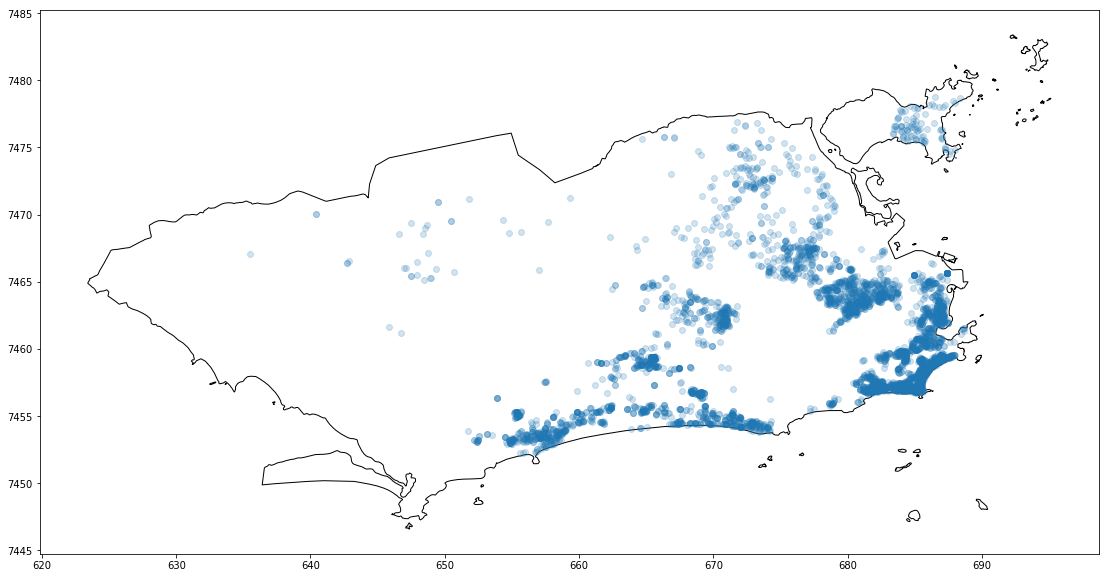

In [34]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (20, 10))
geo_dados.plot(ax = base, figsize = (20, 10), alpha = 0.2)

In [35]:
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')